In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from esios import *

Create dictionary with Indicator Name and Number of Indicator

In [2]:
indicatorsDict = {
# 'Previsión diaria de la demanda eléctrica peninsular' : 460,
#                   'Generación prevista Solar' : 10034,
#                   'Previsión de la producción eólica nacional peninsular' : 541,  
#                   'Precio medio horario componente mercado diario' : 805
#                   'Previsión diaria de la demanda eléctrica peninsular' : 460,
#                   /'Precio medio horario componente mercado diario' : 805,
    'demand': 460,
    'price': 805,
#     'nuclear': 1153,
#     'hydro':10035,
#     'hydro_nouhg':1151,
    'wind':541,
#     'thermo':1162,
    'photo':10034,
#     'bombeo':1152
#                   'Generación T.Real nuclear' : 549,
#                   'Generación T.Real hidráulica' : 546,
#                   'Generación T.Real eólica' : 551,
#                   'Generación T.Real Solar térmica' : 1294,
#                   'Generación T.Real Solar fotovoltaica' : 1295
                 }

indicatorsItems = indicatorsDict.items()   # To iterate over name and number at the same time

Download indicators data from 01/01/2016 to 01/06/2020 and save it into `".csv"` files.

In [3]:
start_date = "2014-01-01"
end_date = "2020-07-01"
start_ = start_date + 'T00:00:00'
end_ = end_date + 'T23:50:00'
token = '6cc21e0b60e9931e7522a6ce72a1a09f3a6fadc6f08b142f956db142c6858bc2'    # Introduce ESIOS token
esios = ESIOS(token)
country = 'Spain' #Spain, France or Portugal are the options

for indicatorName, indicatorValue in indicatorsItems:
    print ('Start Date: ' + start_date)
    print ('End Date: ' + end_date)
    indicators_ = list()
    indicators_.append(indicatorValue)
    dfmul , df_list, names = esios.get_multiple_series(indicators_, start_, end_, country)
    df = dfmul[names]
    df = df.reset_index()
    df.columns = ['date', indicatorName]
    df['date'] = df['date'].str.replace('.', ' ')
    df['date'] = df['date'].str.split().str[0]
    df['date'] = df['date'].str.replace('T', ' ')
    # Export to .csv file
    try:
        os.stat("Files/")
    except:
        os.mkdir("Files/")
    df.to_csv(path_or_buf= 'Files/' + str(indicatorValue) + '.csv', sep='^', index=False)
    print('Generated:' + str(indicatorValue))

Analyzing indicators...
Start Date: 2014-01-01
End Date: 2020-07-01
Generated:460
Start Date: 2014-01-01
End Date: 2020-07-01
Generated:805
Start Date: 2014-01-01
End Date: 2020-07-01
Generated:541
Start Date: 2014-01-01
End Date: 2020-07-01
Generated:10034


Read `'.csv'` files generated in different DataFrames.

In [4]:
with open('Files/460.csv', 'r') as fichero:     
    dfDemand = pd.read_csv(fichero, sep = '^', dtype='object')
    dfDemand['date']=pd.to_datetime(dfDemand['date'])
    
# with open('Files/10034.csv', 'r') as fichero:     
#     dfSolarT = pd.read_csv(fichero, sep = '^', dtype='object')
#     dfSolarT['date']=pd.to_datetime(dfSolarT['date'])
    
with open('Files/10034.csv', 'r') as fichero:     
    dfSolar = pd.read_csv(fichero, sep = '^', dtype='object')
    dfSolar['date']=pd.to_datetime(dfSolar['date']) 
    
with open('Files/541.csv', 'r') as fichero:     
    dfEolic = pd.read_csv(fichero, sep = '^', dtype='object')
    dfEolic['date']=pd.to_datetime(dfEolic['date'])
    
with open('Files/805.csv', 'r') as fichero:     
    dfPrice = pd.read_csv(fichero, sep = '^', dtype='object')
    dfPrice['date']=pd.to_datetime(dfPrice['date']) 
        
# with open('Files/546.csv', 'r') as fichero:     
#     dfHidro = pd.read_csv(fichero, sep = '^', dtype='object')
#     dfHidro['date']=pd.to_datetime(dfHidro['date']) 
        
# with open('Files/549.csv', 'r') as fichero:     
#     dfNuclear = pd.read_csv(fichero, sep = '^', dtype='object')
#     dfNuclear['date']=pd.to_datetime(dfNuclear['date']) 

In [5]:
dfDemand.sample(5)

,date,demand
54046,2020-03-01 22:00:00,28389.0
49191,2019-08-12 16:00:00,30801.0
32893,2017-10-02 14:00:00,32022.0
11314,2015-04-17 11:00:00,31955.0
38351,2018-05-18 00:00:00,25688.0


In [6]:
dfSolar.sample(5)

,date,photo
26338,2017-01-02 10:00:00,1058.1
16754,2015-11-30 02:00:00,3.2
41646,2018-10-02 07:00:00,6.9
42553,2018-11-09 01:00:00,3.0
3228,2014-05-15 13:00:00,5377.9


In [7]:
dfEolic.sample(5)

,date,wind
5701,2014-08-26 14:00:00,7909.0
19034,2016-03-04 02:00:00,6468.0
26699,2017-01-17 11:00:00,12796.0
9331,2015-01-24 19:00:00,9500.0
5710,2014-08-26 23:00:00,5013.0


In [8]:
dfPrice.head(20)

,date,price
0,2014-01-01 00:00:00,20.02
1,2014-01-01 01:00:00,10.34
2,2014-01-01 02:00:00,5.35
3,2014-01-01 03:00:00,5.0
4,2014-01-01 04:00:00,0.5
5,2014-01-01 05:00:00,0.0
6,2014-01-01 06:00:00,0.0
7,2014-01-01 07:00:00,0.0
8,2014-01-01 08:00:00,0.0
9,2014-01-01 09:00:00,0.0


In [9]:
# dfNuclear.sample(5)

In [10]:
dfPrice=dfPrice.merge(dfDemand,left_on='date',right_on='date',how='inner')
# dfPrice=dfPrice.merge(dfSolarT,left_on='date',right_on='date',how='inner')
dfPrice=dfPrice.merge(dfSolar,left_on='date',right_on='date',how='inner')
dfPrice=dfPrice.merge(dfEolic,left_on='date',right_on='date',how='inner')
# dfPrice=dfPrice.merge(dfHidro,left_on='date',right_on='date',how='inner')
# dfPrice=dfPrice.merge(dfNuclear,left_on='date',right_on='date',how='inner')

In [11]:
dfPrice.dtypes

date      datetime64[ns]
price             object
demand            object
photo             object
wind              object
dtype: object

In [12]:
dfPrice['price']=dfPrice['price'].astype(float)
dfPrice['demand']=dfPrice['demand'].astype(float)
# dfPrice['hydro']=dfPrice['hydro'].astype(float)
dfPrice['wind']=dfPrice['wind'].astype(float)
dfPrice['photo']=dfPrice['photo'].astype(float)
# dfPrice['nuclear']=dfPrice['nuclear'].astype(float)
# dfPrice['thermo']=dfPrice['thermo'].astype(float)

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [14]:
new_data = dfPrice[['wind','demand','photo',]]

In [15]:
X = new_data.values
y = dfPrice['price'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [17]:
#Fitting XGB regressor 
model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.4, gamma=0.3, subsample=0.9,
                               colsample_bytree=1, max_depth=5,objective='reg:squarederror')
model.fit(X_train,y_train)
print (model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [18]:
output = model.predict(data=X_test)
output

array([46.537666, 29.904198, 47.61272 , ..., 51.279564, 24.306416,
       48.707893], dtype=float32)

In [19]:
comp=pd.DataFrame({'pred':output,'real':y_test})
comp.head()

,pred,real
0,46.537666,23.72
1,29.904198,27.04
2,47.612720,65.52
3,47.043522,64.69
4,45.393852,47.75


In [20]:
comp.dtypes

pred    float32
real    float64
dtype: object

In [21]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)
def npr2(x,y):
    return np.corrcoef(x,y)[0,1]**2

In [22]:
Xri = comp["pred"].to_numpy()
Yri = comp["real"].to_numpy()
Xr = np.reshape(Xri,(-1,1))
Yr = np.reshape(Yri,(-1,1))

/home/clara/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


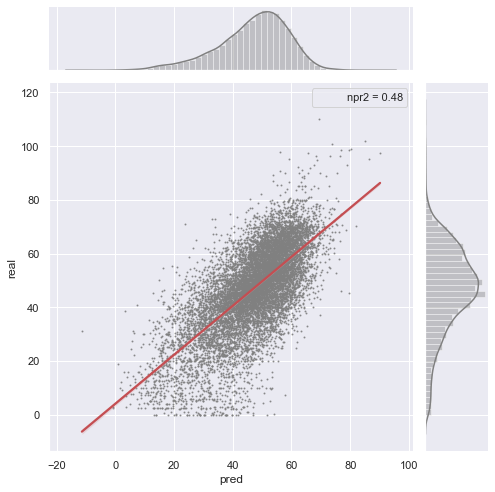

In [23]:
sns.set(style="darkgrid")
g = sns.jointplot("pred", "real", data=comp, kind="reg", color="grey", 
                  height=7,stat_func=npr2, scatter_kws={'s':1},
                  joint_kws={'color':'grey','line_kws':{'color':'r'}})

In [24]:
pintar=dfPrice[dfPrice['date']>='2018-05-01 00:00:00']
pintar.head()

,date,price,demand,photo,wind
37999,2018-05-01 00:00:00,46.23,24004.0,38.7,4339.0
38000,2018-05-01 01:00:00,36.08,22300.0,21.5,4574.0
38001,2018-05-01 02:00:00,34.30,21162.0,72.3,4502.0
38002,2018-05-01 03:00:00,32.72,20476.0,56.4,4613.0
38003,2018-05-01 04:00:00,32.60,20075.0,20.8,4350.0


In [25]:
new_pintar = pintar[['wind','demand','photo']]

In [26]:
y = pintar['price'].values
X = new_pintar.values

In [27]:
output_2 = model.predict(data=X)
output_2

array([45.22808 , 38.10566 , 40.635868, ..., 49.128754, 50.59718 ,
       47.74961 ], dtype=float32)

In [28]:
comp2=pd.DataFrame({'predicted':output_2,'real':y})
comp2.head()

,predicted,real
0,45.228081,46.23
1,38.105659,36.08
2,40.635868,34.30
3,36.130882,32.72
4,32.771744,32.60


/home/clara/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


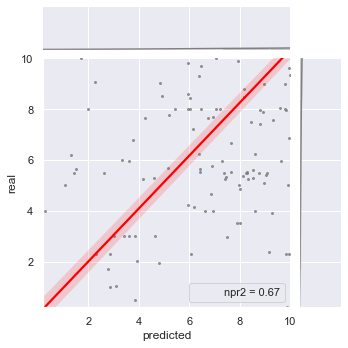

In [29]:
gr = sns.jointplot("predicted", "real", data=comp2, kind="reg",
                  xlim=(0.2, 10), ylim=(0.2, 10), color="grey", 
                 height=5,stat_func=npr2, scatter_kws={'s':4},
                  joint_kws={'color':'grey','line_kws':{'color':'red'}}, ci=95)

In [30]:
PRED=comp.rename(columns={'real':'price'})
PRED.head()

,pred,price
0,46.537666,23.72
1,29.904198,27.04
2,47.612720,65.52
3,47.043522,64.69
4,45.393852,47.75


In [31]:
pre=PRED.merge(dfPrice,left_on= 'price',right_on='price',how='inner')
pre.head()

,pred,price,date,demand,photo,wind
0,46.537666,23.72,2016-04-18 00:00:00,24068.0,222.0,2956.0
1,46.537666,23.72,2020-04-09 12:00:00,23625.0,4010.2,3398.0
2,46.537666,23.72,2020-04-10 23:00:00,21533.0,84.4,2878.0
3,46.537666,23.72,2020-05-14 06:00:00,21450.0,33.2,5647.0
4,36.491737,23.72,2016-04-18 00:00:00,24068.0,222.0,2956.0


In [32]:
pre=pre.drop(['price'],axis=1)

In [33]:
pre=pre.rename(columns={'pred':'price'})
pre.head()

,price,date,demand,photo,wind
0,46.537666,2016-04-18 00:00:00,24068.0,222.0,2956.0
1,46.537666,2020-04-09 12:00:00,23625.0,4010.2,3398.0
2,46.537666,2020-04-10 23:00:00,21533.0,84.4,2878.0
3,46.537666,2020-05-14 06:00:00,21450.0,33.2,5647.0
4,36.491737,2016-04-18 00:00:00,24068.0,222.0,2956.0


In [34]:
pre.head()

,price,date,demand,photo,wind
0,46.537666,2016-04-18 00:00:00,24068.0,222.0,2956.0
1,46.537666,2020-04-09 12:00:00,23625.0,4010.2,3398.0
2,46.537666,2020-04-10 23:00:00,21533.0,84.4,2878.0
3,46.537666,2020-05-14 06:00:00,21450.0,33.2,5647.0
4,36.491737,2016-04-18 00:00:00,24068.0,222.0,2956.0


In [35]:
dfPrice.head()

,date,price,demand,photo,wind
0,2014-01-01 00:00:00,20.02,26252.0,3.5,10790.0
1,2014-01-01 01:00:00,10.34,24040.0,0.0,10885.0
2,2014-01-01 02:00:00,5.35,22829.0,0.0,10984.0
3,2014-01-01 03:00:00,5.00,21816.0,0.5,10680.0
4,2014-01-01 04:00:00,0.50,21439.0,2.2,10605.0


In [36]:
dfPrice=dfPrice[['date','price']]
pre=pre[['date','price']]

In [37]:
preds =pre.sort_values('date').drop_duplicates(subset='date',keep='last')
realdata =dfPrice.sort_values('date').drop_duplicates(subset=['date', 'price'])

In [38]:
preds=preds.tail(2000)
realdata=realdata.tail(2000)

In [39]:
import altair as alt
alt.Chart(preds).mark_line().encode(
    x="date:T",
    y="price"
).properties(
   width=800
)

alt.Chart(...)

In [40]:
alt.Chart(realdata).mark_line().encode(
    x="date:T",
    y="price"
).properties(
   width=800
)

alt.Chart(...)

In [41]:
pre=preds.merge(realdata,left_on='date',right_on='date',how='inner')
pre.head()

,date,price_x,price_y
0,2020-04-09 16:00:00,13.618204,16.50
1,2020-04-09 18:00:00,27.816055,22.66
2,2020-04-09 19:00:00,41.471687,23.00
3,2020-04-09 20:00:00,44.002117,26.20
4,2020-04-09 22:00:00,44.002117,26.20


In [42]:
pre=pre.rename(columns={"price_x": "predict", "price_y": "real"})
pre.head()

,date,predict,real
0,2020-04-09 16:00:00,13.618204,16.50
1,2020-04-09 18:00:00,27.816055,22.66
2,2020-04-09 19:00:00,41.471687,23.00
3,2020-04-09 20:00:00,44.002117,26.20
4,2020-04-09 22:00:00,44.002117,26.20


In [43]:
pre=pre.head(500)
df=pd.melt(pre,id_vars=['date'],value_vars=['predict','real'])
df=df.round(3)
df.head()

,date,variable,value
0,2020-04-09 16:00:00,predict,13.618
1,2020-04-09 18:00:00,predict,27.816
2,2020-04-09 19:00:00,predict,41.472
3,2020-04-09 20:00:00,predict,44.002
4,2020-04-09 22:00:00,predict,44.002


In [44]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

line=alt.Chart(df).mark_line(interpolate='basis').encode(x='date:T',y='value',color='variable')

selectors = alt.Chart(df).mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'value', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df).mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=300
)

alt.LayerChart(...)